<font color="red">IMPORTANT</font>

<font color="red">This is just a template for your project reports. You do not have to use the exact structure here. You may add your own sections/subsections. However, you are required to preserve the same report flow.</font>

# SALARY ESTIMATOR FOR MBA GRADUATES  - Group 36

Group Members:

Ural Sarp Sipahi

Bartu Doğan

Muammer Tunahan Yıldız

Egemen Aydın

Rıza Lider Büyükçanak



In [ ]:
# Egemen:  Üstünkörü, proposaldakiyle aynı olmasın diye yazdım. dursun diye öyle.

"""(1) a high-quality introduction on what you are doing, why you are doing it

-	We are developing a machine Learning program that takes parameters(features) from the user as input and
	give an estimate salary expectation for given feature values. The reason we are doing this program is
	being able to have an opinion and understanding on the criterias that affect MBA graduates salaries.
	Also determining the criterias that affect the final salary most and the least.

(2) a clear description of the datasets you have used

-	We used the Campus Recruitment dataset. The dataset includes the percentages of each individual students at 
	10th and 12th grade (high-school) with their specilizations. Moreover, dataset provides us students Undergraduate
	degree specilziation and its percentage (GPA) too. MBA specilization and GPA is included in the dataset either.
	In the dataset despite students academic features, genders and wether they have work experience or not
	are specified too. Lastly, Employibility test scores which are conducted by colleges, and information of 
	whether the person is placed into a job or not, and if they are placed, their salaries."""

'(1) a high-quality introduction on what you are doing, why you are doing it\n\n-\tWe are developing a machine Learning program that takes parameters(features) from the user as input and\n\tgive an estimate salary expectation for given feature valeus. The reason we are doing this program is\n\tbeing able to have an opinion and understanding on the criterias that affect MBA garaduates salaries.\n\tAlso determining the criterias that affect the final salary most and the least.\n\n(2) a clear description of the datasets you have used\n\n-\tWe used the Campus Recruitment dataset. The dataset includes the percentages of each individual students at \n\t10th and 12th grade (high-school) with their specilizations. Moreover, dataset provides us students Undergraduate\n\tdegree specilziation and its percentage (GPA) too. MBA specilization and GPA is included in the dataset either.\n\tIn the dataset despite students academic features, genders and wether they have work experience or not\n\tare spe

## Introduction

<font color="blue">
Main goal of this project is to create a Machine Learning program that is trained
with various data collected from the campus recruitment dataset in order to
estimate the salaries of Master of Business Administration graduates as
accurately as possible.
</font>

### Problem Definition

<font color="blue">
State your problem in technical terms. What is your end goal? How are you going to solve it?


</font>

### Utilized Datasets

<font color="blue">
Describe the utilized datasets in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps reader understand what you are dealing with.
</font>


https://www.kaggle.com/benroshan/factors-affecting-campus-placement


In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
# Libraries that we may use in the future: 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import json
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%matplotlib inline

Campus Recruitment Dataset

In [ ]:
fname = 'Placement_Data_Full_Class.csv'
df = pd.read_csv(join(path_prefix, fname))
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


Data cleaning by dropping the rows with null values

In [ ]:
df2=df[df['salary'].isnull()]
df = df.dropna() #df doesnt contain missing values.
#df2.head(3)      df2 only contains rows that have salary NaN.

In [ ]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [ ]:
df3 = df.copy() # egemen: df with students without salaries.

df3 = df3.dropna(axis="index", how="any")

df3.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
std,60.682502,8.715445,9.329268,6.518087,13.729333,5.884583,93457.452420
min,1.000000,49.000000,50.830000,56.000000,50.000000,52.380000,200000.000000
25%,57.750000,65.000000,63.000000,65.000000,60.000000,57.772500,240000.000000
50%,108.500000,72.500000,68.000000,68.000000,72.000000,62.245000,265000.000000
75%,153.250000,78.125000,75.250000,72.422500,85.000000,66.760000,300000.000000
max,214.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Feature generation by 

In [ ]:
df3 = df3[['gender', 'ssc_p',  'hsc_p' ,  'degree_p','degree_t','workex','etest_p','specialisation','mba_p','salary']]

df3 = df3.reset_index()
df3 =  df3.drop(columns=['index'])

In [ ]:
df3.head()


,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
4,M,82.00,64.00,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0


In [ ]:
df3['highs_p'] = (df3['ssc_p'] + df3['hsc_p']) / 2

In [ ]:
df3.head()

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,highs_p
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,79.00
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,78.83
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,66.50
3,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,79.70
4,M,82.00,64.00,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0,73.00


In [ ]:
df3 = df3.drop(columns=['ssc_p','hsc_p'])

In [ ]:
df3.head()

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,highs_p
0,M,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,79.00
1,M,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,78.83
2,M,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,66.50
3,M,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,79.70
4,M,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0,73.00


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          148 non-null    object 
 1   degree_p        148 non-null    float64
 2   degree_t        148 non-null    object 
 3   workex          148 non-null    object 
 4   etest_p         148 non-null    float64
 5   specialisation  148 non-null    object 
 6   mba_p           148 non-null    float64
 7   salary          148 non-null    float64
 8   highs_p         148 non-null    float64
dtypes: float64(5), object(4)
memory usage: 10.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


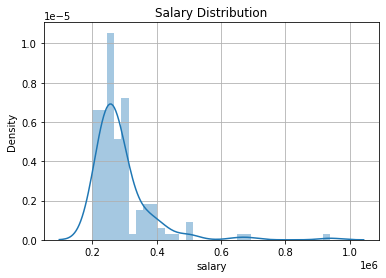

In [ ]:
#salary distrubution:
ax = sns.distplot(df3["salary"])
ax.set_title("Salary Distribution")
ax.grid()
plt.show()

## Data Exploration

<font color="blue">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

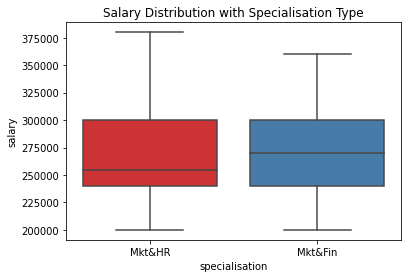

In [ ]:
ax = sns.boxplot(x="specialisation", y="salary", data=df3[["specialisation","salary"]], palette='Set1',showfliers = False)
ax.set_title('Salary Distribution with Specialisation Type')
plt.show()

# extreme values are not shown in the figure

It can be seen from the graph that people who have specialized on marketing & finance get slightly better salaries overall compared to the people who have specialized in marketing & HR

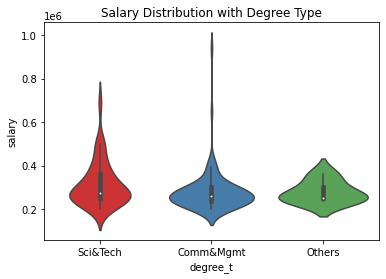

In [ ]:
ax = sns.violinplot(x="degree_t", y="salary", data=df3[["degree_t","salary"]], palette='Set1')
ax.set_title('Salary Distribution with Degree Type')
plt.show()

It can be seen from the graph that people who have graduated in the area of science and technology get more salary in average than people who graduated from management or other areas. However it can also be seen from the graph that there are management graduates who get more salary than science and technology graduates.

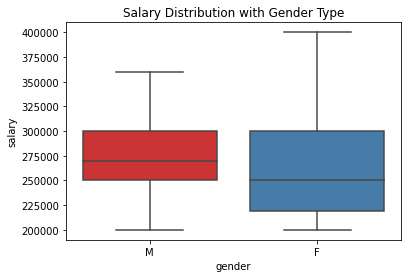

In [ ]:
ax = sns.boxplot(x="gender", y="salary", data=df3[["gender","salary"]], palette='Set1',showfliers = False)
ax.set_title('Salary Distribution with Gender Type')
plt.show()

It can be seen from the graph that females have wider distribution in their salaries compared to males. One can also conclude from the graph that males generally get more salary than females.

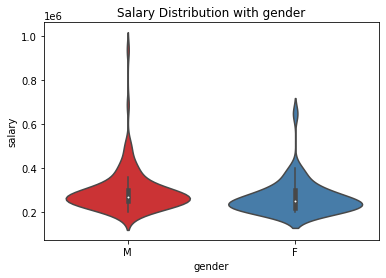

In [ ]:
ax0 = sns.violinplot(x="gender", y="salary", data=df3[["gender","salary"]], palette='Set1')
ax0.set_title('Salary Distribution with gender')
plt.show()

It can be obtained from the graph above, Salary distribution of males have higher median than females. Also maximum salary for males are also higher than maximum female salaries. 

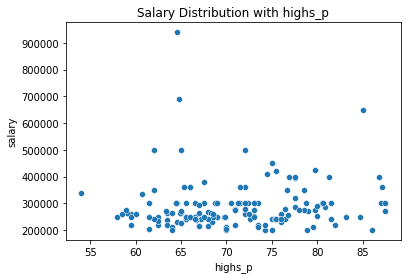

In [ ]:
ax2 = sns.scatterplot(x="highs_p", y="salary", data=df3[["highs_p","salary"]], palette='Set1')
ax2.set_title('Salary Distribution with highs_p')
plt.show()

The scatterplot above does not show a clear correlation between salary and high-school grades. The average salary is distributed relatively even amongst people who got grades from 55 to 80. The graph also shows that the person who got the highest grade does not get the highest salary therefore we cannot make any assumptions such as the person who got the lowest grade in high-school will get the lowest salary or vice versa.

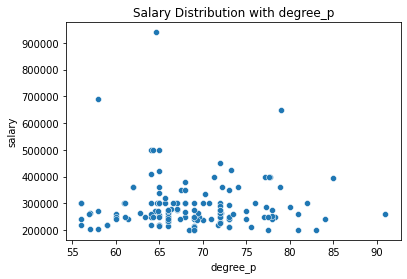

In [ ]:
ax7 = sns.scatterplot(x="degree_p", y="salary", data=df3[["degree_p","salary"]], palette='Set1')
ax7.set_title('Salary Distribution with Under Graduate Degree Percentages')
#ax7.set(xlim=(45, 100))
plt.show()

This graph shows the correlation between degree percentages and salaries.

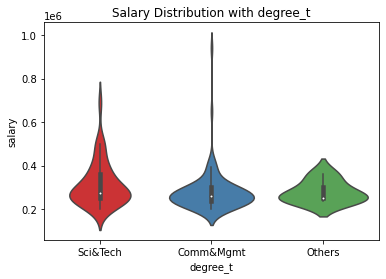

In [ ]:
ax8 = sns.violinplot(x="degree_t", y="salary", data=df3[["degree_t","salary"]], palette='Set1')
ax8.set_title('Salary Distribution with Under Graduation Degree Types')
plt.show()

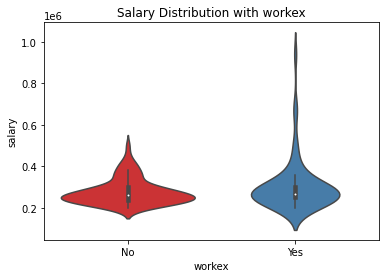

In [ ]:
ax9 = sns.violinplot(x="workex", y="salary", data=df3[["workex","salary"]], palette='Set1')
ax9.set_title('Salary Distribution with Work Experience')
plt.show()


It can be seen that people who have work experience are able to gain higher salaries that their counterparts who have no work experience. 

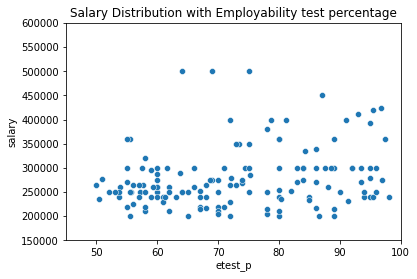

In [ ]:
ax10 = sns.scatterplot(x="etest_p", y="salary", data=df3[["etest_p","salary"]], palette='Set1')
ax10.set_title('Salary Distribution with Employability test percentage')
ax10.set(xlim=(45, 100))
ax10.set(ylim=(min(df3['salary'].values)-50000, 600000))
plt.show()

Here we can see that the correlation between Employability test results and each individual's current salary. There is a positive correlation between these two parametres, which can be understood that employability tests give clues of an employee's expected salary.

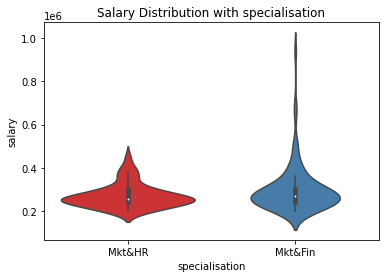

In [ ]:
ax11 = sns.violinplot(x="specialisation", y="salary", data=df3[["specialisation","salary"]], palette='Set1')
ax11.set_title('Salary Distribution with Specialisation')
plt.show()


The two violin plots show students' specialisation areas after graduating from MBA. Including the extreme values, it is clear that students' who specialised in Finance area are expected to have higher salaries against students who specialized in Human Resources. It is easier to estimate the salary of students who specialized in HR area due to the fact that left plot is more flattened and there are less extreme values.

## Machine Learning Models

<font color="blue">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

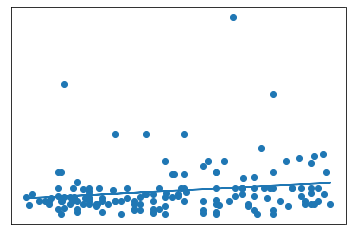

In [ ]:
# bartu
length = 148
from sklearn import datasets, linear_model
x = df.etest_p.values
y = df.salary.values
x = x.reshape(length, 1)
y = y.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y)
plt.plot(x, regr.predict(x))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#sarp  bir şeyler denedim de olmadı
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


encoder=LabelEncoder()

for col in df.columns:
   if df[col].dtype == 'object':
     encoder.fit(df[col])
     df[col] = encoder.transform(df[col])

Y=df['salary']

X=df.drop(['salary','status','sl_no'],axis=1)
X=pd.get_dummies(X)


# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, Y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)



lr=LinearRegression()
lr.fit(X_train,y_train)

print('Linear Regression score is:' + str(lr.score(X_test, y_test)))

Linear Regression score is:-0.23223003183945923


### Implementation

<font color="blue">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>

### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

## Conclusion

<font color="blue">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>


## Future Work

<font color="blue">
In the progress report, clearly state your goals for the final report.<br>
In the final report, articulate on the future directions, scenarios.
</font>

## Work Division



<font color="blue">
A clear description of the division of work among teammates.
</font>